In [1]:
import tensorflow as tf
import numpy as np
import math
import os
import random
import numpy as np
import pandas as pd
from pandas import DataFrame
import math
import copy
import pickle

In [2]:
train = pd.read_csv('../../data/train_scaled_encoded.csv')
train.head()

,0,1,2,3,4,5,6,7,8,9,...,194,195,196,197,198,199,vaso_input,iv_input,reward,icustayid
0,0.029027,0.061212,0.224086,0.079448,0.052524,0.077151,0.103817,0.063714,0.032102,0.042459,...,0.083823,0.053838,0.081020,0.057297,0.030372,0.047363,0,0.0,0.0,12.0
1,0.031518,0.078677,0.120369,0.040228,0.047623,0.104624,0.093498,0.073046,0.035958,0.056553,...,0.088714,0.073047,0.083202,0.043883,0.036930,0.057726,0,0.0,0.0,12.0
2,0.030942,0.083416,0.106333,0.040481,0.039120,0.098819,0.077658,0.074696,0.041053,0.053553,...,0.092754,0.079161,0.082560,0.041910,0.036587,0.067986,0,0.0,0.0,12.0
3,0.042970,0.050963,0.090261,0.093201,0.031332,0.057674,0.032040,0.054802,0.061447,0.053960,...,0.098049,0.074196,0.088113,0.045784,0.041096,0.129189,0,0.0,15.0,12.0
4,0.064572,0.084793,0.065976,0.070753,0.063990,0.051591,0.050112,0.049624,0.092619,0.080058,...,0.032011,0.081824,0.037519,0.061251,0.071471,0.039540,0,4.0,0.0,14.0


In [3]:
test = pd.read_csv('../../data/test_scaled_encoded.csv')
test.head()

,0,1,2,3,4,5,6,7,8,9,...,194,195,196,197,198,199,vaso_input,iv_input,reward,icustayid
0,0.044787,0.024944,0.059501,0.186372,0.099174,0.010116,0.015910,0.031792,0.063170,0.050696,...,0.037952,0.041529,0.046699,0.054380,0.082892,0.012378,0,4.0,0.0,61.0
1,0.048257,0.029508,0.033046,0.102542,0.107019,0.015018,0.014971,0.034197,0.057205,0.072662,...,0.037210,0.051388,0.044145,0.039312,0.096143,0.013473,0,4.0,0.0,61.0
2,0.041906,0.028968,0.028705,0.111719,0.098205,0.013579,0.012648,0.027884,0.074506,0.081935,...,0.037256,0.055131,0.042269,0.039004,0.103266,0.015244,0,4.0,0.0,61.0
3,0.040383,0.029019,0.029167,0.131740,0.099840,0.013389,0.012455,0.028260,0.072425,0.088626,...,0.037022,0.057600,0.039294,0.038362,0.117384,0.015660,0,4.0,0.0,61.0
4,0.045685,0.029040,0.027817,0.137894,0.106901,0.013968,0.012697,0.028393,0.073113,0.088150,...,0.036816,0.058196,0.038383,0.038041,0.123431,0.014925,0,4.0,0.0,61.0


In [4]:
REWARD_THRESHOLD =15
reg_lambda = 5

In [5]:
# PER important weights and params
per_flag = True
beta_start = 0.9
train['prob'] = abs(train['reward'])
temp = 1.0 / train['prob']
temp[temp == float('Inf')] = 1.0
train['imp_weight'] = pow((1.0 / len(train) * temp), beta_start)

In [6]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,196,197,198,199,vaso_input,iv_input,reward,icustayid,prob,imp_weight
0,0.029027,0.061212,0.224086,0.079448,0.052524,0.077151,0.103817,0.063714,0.032102,0.042459,...,0.081020,0.057297,0.030372,0.047363,0,0.0,0.0,12.0,0.0,0.000022
1,0.031518,0.078677,0.120369,0.040228,0.047623,0.104624,0.093498,0.073046,0.035958,0.056553,...,0.083202,0.043883,0.036930,0.057726,0,0.0,0.0,12.0,0.0,0.000022
2,0.030942,0.083416,0.106333,0.040481,0.039120,0.098819,0.077658,0.074696,0.041053,0.053553,...,0.082560,0.041910,0.036587,0.067986,0,0.0,0.0,12.0,0.0,0.000022
3,0.042970,0.050963,0.090261,0.093201,0.031332,0.057674,0.032040,0.054802,0.061447,0.053960,...,0.088113,0.045784,0.041096,0.129189,0,0.0,15.0,12.0,15.0,0.000002
4,0.064572,0.084793,0.065976,0.070753,0.063990,0.051591,0.050112,0.049624,0.092619,0.080058,...,0.037519,0.061251,0.071471,0.039540,0,4.0,0.0,14.0,0.0,0.000022


In [7]:
train.loc[train['icustayid'] == 14]

,0,1,2,3,4,5,6,7,8,9,...,196,197,198,199,vaso_input,iv_input,reward,icustayid,prob,imp_weight
4,0.064572,0.084793,0.065976,0.070753,0.063990,0.051591,0.050112,0.049624,0.092619,0.080058,...,0.037519,0.061251,0.071471,0.039540,0,4.0,0.0,14.0,0.0,0.000022
5,0.074025,0.079019,0.069797,0.068576,0.069831,0.043737,0.056884,0.073837,0.073740,0.075134,...,0.040486,0.053812,0.067138,0.043424,0,3.0,0.0,14.0,0.0,0.000022
6,0.067640,0.073252,0.077615,0.072775,0.074835,0.040598,0.054152,0.078552,0.073434,0.086740,...,0.043017,0.054578,0.068782,0.045069,0,3.0,0.0,14.0,0.0,0.000022
7,0.084182,0.069916,0.070347,0.069123,0.072279,0.034510,0.053141,0.090075,0.061658,0.072907,...,0.049218,0.054276,0.064720,0.051236,0,2.0,0.0,14.0,0.0,0.000022
8,0.113805,0.048466,0.068828,0.080646,0.059614,0.016070,0.028201,0.081736,0.072616,0.049215,...,0.051598,0.057034,0.067416,0.083398,0,0.0,0.0,14.0,0.0,0.000022
9,0.103441,0.079006,0.073327,0.083135,0.065522,0.030426,0.026677,0.059899,0.066019,0.055480,...,0.065361,0.069394,0.072032,0.120818,0,0.0,0.0,14.0,0.0,0.000022
10,0.101310,0.064388,0.070295,0.103702,0.062022,0.026225,0.029238,0.069330,0.088385,0.064827,...,0.063749,0.072680,0.077492,0.109648,0,2.0,0.0,14.0,0.0,0.000022
11,0.089622,0.053569,0.067050,0.118848,0.064748,0.025035,0.034923,0.078645,0.086481,0.075960,...,0.063923,0.076082,0.078420,0.104181,0,2.0,0.0,14.0,0.0,0.000022
12,0.094056,0.052298,0.068664,0.119672,0.071022,0.029564,0.037301,0.062040,0.070939,0.079584,...,0.052991,0.083214,0.070643,0.099471,0,2.0,0.0,14.0,0.0,0.000022
13,0.093668,0.047470,0.073948,0.109111,0.074271,0.028844,0.038724,0.067044,0.064909,0.077116,...,0.048472,0.077113,0.064924,0.103841,0,2.0,15.0,14.0,15.0,0.000002


In [8]:
hidden_1_size = 400
hidden_2_size = 400

class Qnetwork():
    def __init__(self):
        
        self.phase = tf.placeholder(tf.bool)
        self.num_actions = 25
        self.input_size = 200
        self.state = tf.placeholder(tf.float32, shape=[None, self.input_size],name="input_state")
        
        self.fc_1 = tf.contrib.layers.fully_connected(self.state, hidden_1_size, activation_fn=None)
        self.fc_1_bn = tf.contrib.layers.batch_norm(self.fc_1, center=True, scale=True, is_training=self.phase)
        self.fc_1_ac = tf.maximum(self.fc_1_bn, self.fc_1_bn * 0.5)
        
        self.fc_2 = tf.contrib.layers.fully_connected(self.fc_1_ac, hidden_2_size, activation_fn=None)
        self.fc_2_bn = tf.contrib.layers.batch_norm(self.fc_2, center=True, scale=True, is_training=self.phase)
        self.fc_2_ac = tf.maximum(self.fc_2_bn, self.fc_2_bn * 0.5)
        
        # advantage and value streams
        self.streamA, self.streamV = tf.split(self.fc_2_ac,2,axis=1)
        self.AW = tf.Variable(tf.random_normal([hidden_2_size//2, self.num_actions]))
        self.VW = tf.Variable(tf.random_normal([hidden_2_size//2, 1]))
        self.Advantage = tf.matmul(self.streamA, self.AW)
        self.Value = tf.matmul(self.streamV,self.VW)
        
        # Then combine them together to get our final Q-values.
        self.q_output = self.Value + tf.subtract(self.Advantage, tf.reduce_mean(self.Advantage,axis=1,keep_dims=True))
        self.predict = tf.argmax(self.q_output, 1, name='predict') # vector of length batch size
        
        #Below we obtain the loss by taking the sum of squares difference between the target and predicted Q values.
        self.targetQ = tf.placeholder(shape=[None],dtype=tf.float32)
        self.actions = tf.placeholder(shape=[None],dtype=tf.int32)
        self.actions_onehot = tf.one_hot(self.actions, self.num_actions,dtype=tf.float32)
        
        # Importance sampling weights for PER, used in network update    
        self.imp_weights = tf.placeholder(shape=[None], dtype=tf.float32)
        # select the Q values for the actions that would be selected
        self.Q = tf.reduce_sum(tf.multiply(self.q_output, self.actions_onehot), reduction_indices=1) # batch size x 1 vector
        
        # reward threshold, to ensure reasonable Q-value predictions  
        self.reg_vector = tf.maximum(tf.abs(self.Q)-REWARD_THRESHOLD,0)
        self.reg_term = tf.reduce_sum(self.reg_vector)
        
        self.abs_error = tf.abs(self.targetQ - self.Q)
        
        self.td_error = tf.square(self.targetQ - self.Q)
        
        # below is the loss when we are not using PER
        self.old_loss = tf.reduce_mean(self.td_error)
        
        # as in the paper, to get PER loss we weight the squared error by the importance weights
        self.per_error = tf.multiply(self.td_error, self.imp_weights)

        # total loss is a sum of PER loss and the regularisation term
        if per_flag:
            self.loss = tf.reduce_mean(self.per_error) + reg_lambda*self.reg_term
        else:
            self.loss = self.old_loss + reg_lambda * self.reg_term

        self.trainer = tf.train.AdamOptimizer(learning_rate=0.0001)
        self.update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
        with tf.control_dependencies(self.update_ops):
        # Ensures that we execute the update_ops before performing the model update, so batchnorm works
            self.update_model = self.trainer.minimize(self.loss)

In [9]:
# function is needed to update parameters between main and target network
# tf_vars are the trainable variables to update, and tau is the rate at which to update
# returns tf ops corresponding to the updates
def update_target_graph(tf_vars,tau):
    total_vars = len(tf_vars)
    op_holder = []
    for idx,var in enumerate(tf_vars[0:int(total_vars/2)]):
        op_holder.append(tf_vars[idx+int(total_vars/2)].assign((var.value()*tau) + ((1-tau)*tf_vars[idx+int(total_vars/2)].value())))
    return op_holder

In [10]:
def update_target(op_holder,sess):
    for op in op_holder:
        sess.run(op)

In [11]:
# define an action mapping - how to get an id representing the action from the (iv,vaso) tuple
action_map = {}
count = 0
for iv in range(5):
    for vaso in range(5):
        action_map[(iv, vaso)] = count
        count += 1

In [17]:
# generates batches for the Q network - depending on train and eval_type, can select data from train/val/test sets.
def process_batch(size, train_phase=True, eval_type = None):
    
    if not train_phase:
        
        if eval_type is None:
            raise Exception('Provide eval_type to process_batch')
        elif eval_type == 'train':
            a = train.copy()
        elif eval_type == 'val':
            a = val_df.copy()
        elif eval_type == 'test':
            a = test.copy()
        else:
            raise Exception('Unknown eval_type')
    else:
        if per_flag:
            # uses prioritised exp replay
            a = train.sample(n=size, weights=train['prob'])
        else:
            a = train.sample(n=size)
            
    if size == None:
        size = len(a)
    
    states = np.zeros((size, 200))
    actions = np.zeros((size, 1), dtype=int)
    rewards = np.zeros((size, 1))
    next_states = np.zeros((size, 200))
    done_flags = np.zeros((size, 1))
    
    counter = 0
    for idx, obser in a.iterrows():
        cur_state = obser[:200]
        iv = int(obser.loc['iv_input'])
        vaso = int(obser.loc['vaso_input'])
        action = action_map[iv, vaso]
        reward = obser.loc['reward']
        
        if idx != train.index[-1]:
            # if not terminal step in trajectory             
            if train.loc[idx, 'icustayid'] == train.loc[idx + 1, 'icustayid']:
                next_state = train.iloc[idx + 1, :200]
                done = 0
            else:
                # trajectory is finished
                next_state = np.zeros(len(cur_state))
                done = 1
        else:
            # last entry in df is the final state of that trajectory
            next_state = np.zeros(len(cur_state))
            done = 1
        
        states[counter] = cur_state
        actions[counter] = action
        rewards[counter] = reward
        next_states[counter] = next_state
        done_flags[counter] = done
        counter += 1
    return (states, np.squeeze(actions), np.squeeze(rewards), next_states, np.squeeze(done_flags), a)

In [13]:
#  Used to run diagnostics on the train set
phys_q_train = []
agent_q_train = []
phys_actions_tr = []
agent_actions_tr = []

def train_set_performance():
    count = 0
    global phys_q_train
    global agent_q_train
    global phys_actions
    global agent_actions
    phys_q_train = []
    agent_q_train = []
    phys_actions_tr = []
    agent_actions_tr = []
    for r in train.index:
        cur_state = [train.iloc[r, :200]]
        iv = int(train.loc[r, 'iv_input'])
        vaso = int(train.loc[r, 'vaso_input'])
        action = action_map[iv, vaso]
        output_q = np.squeeze(sess.run(mainQN.q_output, feed_dict = {mainQN.state : cur_state, mainQN.phase : False}))
        phys_q_train.append(output_q[action])
        agent_q_train.append(max(output_q))
        agent_actions_tr.append(np.argmax(output_q))
        phys_actions_tr.append(action)
        count += 1

In [14]:
def do_eval(eval_type):
    states,actions,rewards,next_states,done_flags, _ = process_batch(size=None,train_phase=False,eval_type=eval_type)
    # firstly get the chosen actions at the next timestep
    actions_from_q1 = sess.run(mainQN.predict,feed_dict={mainQN.state: next_states, mainQN.phase : 0})

    # Q values for the next timestep from target network, as part of the Double DQN update
    Q2 = sess.run(targetQN.q_output,feed_dict={targetQN.state:next_states, targetQN.phase : 0})
    # handles the case when a trajectory is finished
    end_multiplier = 1 - done_flags

    # target Q value using Q values from target, and actions from main
    double_q_value = Q2[range(len(actions_from_q1)), actions_from_q1]

    # definition of target Q
    targetQ = rewards + ( gamma * double_q_value * end_multiplier )

    # get the output q's, actions, and loss
    q_output, actions_taken, abs_err = sess.run([mainQN.q_output, mainQN.predict, mainQN.abs_error], \
        feed_dict={mainQN.state:states,
                   mainQN.targetQ:targetQ, 
                   mainQN.actions:actions,
                   mainQN.phase:False})
    # return the relevant q values and actions
    phys_q = q_output[range(len(q_output)), actions]
    agent_q = q_output[range(len(q_output)), actions_taken]
    error = np.mean(abs_err)
    
    return phys_q, actions, agent_q, actions_taken, error

In [15]:
def do_save_results():
    
    # get the chosen actions for the train, val, and test set when training is complete.
    phys_q_train, actions_train, agent_q_train, agent_actions_train, _ = do_eval(eval_type = 'train')        
    # phys_q_val, actions_val, agent_q_val, agent_actions_val, _ = do_eval(eval_type = 'val')        
    phys_q_test, actions_test, agent_q_test, agent_actions_test, _ = do_eval(eval_type = 'test')  
    
    # save everything for later - they're used in policy evaluation and when generating plots
    
    ## Physician q
    with open(save_dir + 'dqn_autoencode_phy_q_train.p', 'wb') as f:
        pickle.dump(phys_q_train, f)
#     with open(save_dir + 'dqn_autoencode_phy_q_val.p', 'wb') as f:
#         pickle.dump(phys_q_val, f)
    with open(save_dir + 'dqn_autoencode_phy_q_test.p', 'wb') as f:
        pickle.dump(phys_q_test, f)
    
    ## Physician action
    with open(save_dir + 'dqn_autoencode_phy_actions_train.p', 'wb') as f:
        pickle.dump(actions_train, f)
#     with open(save_dir + 'dqn_autoencode_phy_actions_val.p', 'wb') as f:
#         pickle.dump(actions_val, f)
    with open(save_dir + 'dqn_autoencode_phy_actions_test.p', 'wb') as f:
        pickle.dump(actions_test, f)
    
    ## Agent actions
    with open(save_dir + 'dqn_autoencode_agent_actions_train.p', 'wb') as f:
        pickle.dump(agent_actions_train, f)
#     with open(save_dir + 'dqn_autoencode_actions_val.p', 'wb') as f:
#         pickle.dump(agent_actions_val, f)
    with open(save_dir + 'dqn_autoencode_agent_actions_test.p', 'wb') as f:
        pickle.dump(agent_actions_test, f)
    
    ## Agent Q
    with open(save_dir + 'dqn_autoencode_agent_q_train.p', 'wb') as f:
        pickle.dump(agent_q_train, f)
#     with open(save_dir + 'dqn_autoencode_q_val.p', 'wb') as f:
#         pickle.dump(agent_q_val, f)
    with open(save_dir + 'dqn_autoencode_agent_q_test.p', 'wb') as f:
        pickle.dump(agent_q_test, f)
    return

In [25]:
# The main training loop is here
per_alpha = 0.6 # PER hyperparameter
per_epsilon = 0.01 # PER hyperparameter
batch_size = 30 #How many experiences to use for each training step.
gamma = 0.99 #Discount factor on the target Q-values
num_steps = 300000
load_model = False #Whether to load a saved model.
save_dir = '../../data/dqn/'
save_path = "./model/"#The path to save our model to.
tau = 0.001 #Rate to update target network toward primary network
tf.reset_default_graph()
mainQN = Qnetwork()
targetQN = Qnetwork()
av_q_list = []
save_results = False

saver = tf.train.Saver(tf.global_variables())

init = tf.global_variables_initializer()
trainables = tf.trainable_variables()
target_ops = update_target_graph(trainables, tau)

#Make a path for our model to be saved in.
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

with tf.Session() as sess:
    if load_model == True:
        print('Trying to load model...')
        try:
            restorer = tf.train.import_meta_graph(save_path + 'ckpt.meta')
            restorer.restore(sess, tf.train.latest_checkpoint(save_dir))
            print ("Model restored")
        except IOError:
            print ("No previous model found, running default init")
            sess.run(init)
        try:
            per_weights = pickle.load(open( save_dir + "per_weights.p", "rb" ))
            imp_weights = pickle.load(open( save_dir + "imp_weights.p", "rb" ))
            
            # the PER weights, governing probability of sampling, and importance sampling
            # weights for use in the gradient descent updates
            train['prob'] = per_weights
            train['imp_weight'] = imp_weights
            print ("PER and Importance weights restored")
        except IOError:
            print("No PER weights found - default being used for PER and importance sampling")
    else:
        print("Running default init")
        sess.run(init)
    print("Init done")
    
    for i in range(num_steps):
        
        if save_results:
            do_save_results()
            break
            
        net_loss = 0.0
        net_q = 0.0
        states, actions, rewards, next_states, done_flags, sampled_df = process_batch(batch_size)
        # firstly get the chosen actions at the next timestep
        actions_from_q1 = sess.run(mainQN.predict, feed_dict={mainQN.state:next_states, mainQN.phase : 1})
        # actions chosen now, as a check
        cur_act = sess.run(mainQN.predict, feed_dict={mainQN.state:states, mainQN.phase : 1})
        
        # Q values for the next timestep from target network, as part of the Double DQN update
        Q2 = sess.run(targetQN.q_output, feed_dict={targetQN.state:next_states, targetQN.phase : 1})
        # handles the case when a trajectory is finished
        end_multiplier = 1 - done_flags
        
        # target Q value using Q values from target, and actions from main
        double_q_value = Q2[range(batch_size), actions_from_q1]
        
        # empirical hack to make the Q values never exceed the threshold - helps learning
        double_q_value[double_q_value > REWARD_THRESHOLD] = REWARD_THRESHOLD
        double_q_value[double_q_value < -REWARD_THRESHOLD] = -REWARD_THRESHOLD
        
        # definition of target Q
        targetQ = rewards + (gamma * double_q_value * end_multiplier)
        
        # Calculate the importance sampling weights for PER
        imp_sampling_weights = np.array(sampled_df['imp_weight'] / float(max(train['imp_weight'])))
        imp_sampling_weights[np.isnan(imp_sampling_weights)] = 1
        imp_sampling_weights[imp_sampling_weights <= 0.001] = 0.001
        
        # Train with the batch
        _, loss, error, q_output = sess.run([mainQN.update_model, mainQN.loss, mainQN.abs_error, mainQN.q_output], \
            feed_dict={mainQN.state: states,
                       mainQN.targetQ: targetQ, 
                       mainQN.actions: actions,
                       mainQN.phase: True,
                       mainQN.imp_weights: imp_sampling_weights})
        
        # print (q_output)
        
        ### TODO: update the target network every 200 steps
        # Update target towards main network
        # if i % 200 == 0:
        update_target(target_ops, sess)
        
        net_loss += sum(error)
        net_q += np.mean(targetQ)
        
        # Set the selection weight/prob to the abs prediction error and update the importance sampling weight
        new_weights = pow((error + per_epsilon), per_alpha)
        train.loc[train.index.isin(sampled_df.index), 'prob'] = new_weights
        temp = 1.0 / new_weights
        train.loc[train.index.isin(sampled_df.index), 'imp_weight'] = pow(((1.0/len(train)) * temp), beta_start)
        
        
        if i % 1000 == 0 and i > 0:
            saver.save(sess,save_path)
            print("Saved Model, step is " + str(i))
            
            av_loss = net_loss / 1000.0
            print("Average loss is ", av_loss)
            net_loss = 0.0
             
            print ("Saving PER and importance weights")
            with open(save_dir + 'per_weights.p', 'wb') as f:
                pickle.dump(train['prob'], f)
            with open(save_dir + 'imp_weights.p', 'wb') as f:
                pickle.dump(train['imp_weight'], f)
        
        if (i % 1000 == 0) and i > 0:
            print ('step:', i)
            print ("physactions ", actions)
            print (" chosen actions ", cur_act)
            if i >= 1000:
                # run an evaluation on the validation set
                phys_q, phys_actions, agent_q, agent_actions, mean_abs_error = do_eval(eval_type = 'test')       
                print ('mean abs err:', mean_abs_error)
                print ('mean phys Q:', np.mean(phys_q))
                print ('mean agent Q:', np.mean(agent_q))
            print ('------------------------')

Running default init
Init done
Saved Model, step is 1000
Average loss is  0.4033934021
Saving PER and importance weights
step: 1000
physactions  [10  0 21  0 15 14  5  0  0 15  5  5  5  0 24 12 15 24  3 15  0 23 23  0 10
  0 15  0  5  0]
 chosen actions  [ 4  4  6  8 16  2  7  2 22 24  4  6 12  5  1 22 22 24  2  4  3 13  2  1  3
  4  6 18 21  4]
mean abs err: 2.60468
mean phys Q: 1.78443
mean agent Q: 3.19857
------------------------
Saved Model, step is 2000
Average loss is  0.509499105453
Saving PER and importance weights
step: 2000
physactions  [ 5 10  5  0  0  0  0  0  0  5  0  0  0 20 15 12 20 16  0 10 10  5  0 10  5
 10  5  0 20 11]
 chosen actions  [12  2 24 11  4 22 15 19  7  1  4 17  4  1  2  8  4  4  1  1 12  4 22  2 22
  6 24 23  0 22]
mean abs err: 2.71939
mean phys Q: 2.22827
mean agent Q: 4.45919
------------------------
Saved Model, step is 3000
Average loss is  0.476675319672
Saving PER and importance weights
step: 3000
physactions  [ 5  0  5  1  0  5 20 15 15 15  0  5 

Saved Model, step is 21000
Average loss is  0.318089565277
Saving PER and importance weights
step: 21000
physactions  [ 0 18  5  0  0 10  5 10 21  7 24  0  5  0  0  0  0 20 15  5 14 10 10 20 20
 15 10  0  0  0]
 chosen actions  [ 4 22  5  7  4 15  3  0  7 10 12 12 12 14 15  4 22 15 22 18  0  4 15  3 17
  5  8 15  4  4]
mean abs err: 4.48753
mean phys Q: 9.23444
mean agent Q: 14.7213
------------------------
Saved Model, step is 22000
Average loss is  0.246401059628
Saving PER and importance weights
step: 22000
physactions  [ 5 20  5  0  0  0  0 24  0  0 23 20  0  0 15  5  0  0  0 15  0  0  0  5  0
 10 15  5 10 21]
 chosen actions  [15 17 22  4  0 11  2 12  4  4  6 11  2 24 23  5 22 17  0  2  4  4 22  4 17
 11 11 12  6 15]
mean abs err: 5.6546
mean phys Q: 11.3184
mean agent Q: 15.981
------------------------
Saved Model, step is 23000
Average loss is  0.334937782764
Saving PER and importance weights
step: 23000
physactions  [20  2 24  0  5 24 10 20  8  0  0  0 20  5  0  0  0  0 20  4  

Saved Model, step is 41000
Average loss is  0.219026841164
Saving PER and importance weights
step: 41000
physactions  [ 0  0 20  0  0  0  0 21  0  5  0 10  0  0 11  5  5 16 15  0  3 10  5  5  0
  5  0 10  5  0]
 chosen actions  [22  4 11 17  2  4 20 14  5  5 15 10  4  4  4  8  0 20  0  0  0 10 17  0  0
 15 16  8 15  2]
mean abs err: 4.4734
mean phys Q: 11.228
mean agent Q: 14.2961
------------------------
Saved Model, step is 42000
Average loss is  0.200200876236
Saving PER and importance weights
step: 42000
physactions  [ 0  0  0  5 11 15 20 15  0  0 15  5  0 10  2  0  0  2  0  5  0  0  0 15 20
  0  5  0 13  0]
 chosen actions  [ 4  0  8 15 15  0  4  4  4 16  4  0  5  4 10 24  5 15 10 16  0 16  5 15  5
 20  4 16 15 15]
mean abs err: 4.24901
mean phys Q: 11.3127
mean agent Q: 14.4507
------------------------
Saved Model, step is 43000
Average loss is  0.300801960945
Saving PER and importance weights
step: 43000
physactions  [ 0 15 10 24 23 15 15 13  0  5  0  0  0 10  0  0  0 10 15 15  

Saved Model, step is 61000
Average loss is  0.205744282722
Saving PER and importance weights
step: 61000
physactions  [ 0  0 15  5 19  0 11  0 15  5 15  5 15  0 15  0 20  5 10  5  5 10  0  0 15
  0 20 10 14  5]
 chosen actions  [20  6 12  0  1 23 15  1 11 24 15  5  4  2 17  6  5 15  0  0 17  1 23  6 24
  0 23 15 15  6]
mean abs err: 5.09588
mean phys Q: 9.97701
mean agent Q: 12.4297
------------------------
Saved Model, step is 62000
Average loss is  0.254281147003
Saving PER and importance weights
step: 62000
physactions  [ 0 10 15  0 16  0 20  0  0 10 10  0 24  0 22  0 10  4  0  5  0  0  0  0 15
 15  5 10  0  0]
 chosen actions  [24  0 18  1 15  6  0 22 23  0  0  6  0 17  0  0 13  0 13 18  6 12  2  0 15
  0  0 15  1  1]
mean abs err: 4.63317
mean phys Q: 11.2066
mean agent Q: 13.5892
------------------------
Saved Model, step is 63000
Average loss is  0.174262926102
Saving PER and importance weights
step: 63000
physactions  [15  5  0  5  0  5  0  5  0  5  5 23  5  0  0  0  0  5  0 15

Saved Model, step is 81000
Average loss is  0.130662606239
Saving PER and importance weights
step: 81000
physactions  [ 0  0  0  0  5  0 10  7  0  0 24  5  0  0  0  5 10  0  5  0  5  0  0  7  0
  5  5  5  5  0]
 chosen actions  [21 18 10 10 16  0 11 11 20  0  6 15  0  0 16  8  8  0  6 10 11  6  6 20  4
  6 11 11 11  0]
mean abs err: 5.3419
mean phys Q: 11.5518
mean agent Q: 14.1699
------------------------
Saved Model, step is 82000
Average loss is  0.199467320442
Saving PER and importance weights
step: 82000
physactions  [ 0 15 15 10 14 10 22  0 10  0 19  5  0  0  0  0  0 20  0  5 10 10  5 10  0
  5 10 15  0 10]
 chosen actions  [15  6 17  0 15  6  0 13 17 11 20 21 15 12  0 11 21 11 15  0  6  0 15 20 14
 15 14  0 13 11]
mean abs err: 5.48343
mean phys Q: 11.5326
mean agent Q: 14.5819
------------------------
Saved Model, step is 83000
Average loss is  0.166183551311
Saving PER and importance weights
step: 83000
physactions  [ 0  0 10  5  0 10 15  0  0  0  0 13  5  0  9  0  5 15  0  7 

Saved Model, step is 101000
Average loss is  0.189395370483
Saving PER and importance weights
step: 101000
physactions  [ 0  5  0  0  0  5  0  0  5  5 15  0 10  0  5  0 20  5  3 10  0  5  5 17 10
 24  0 11 10  5]
 chosen actions  [22 14  7  5 13 15 15 15 22 20 15 22  5 15 20 11 23 17 24 14 17  0 17  8  0
 13 13  6  8 15]
mean abs err: 5.99929
mean phys Q: 11.1536
mean agent Q: 13.7877
------------------------
Saved Model, step is 102000
Average loss is  0.187538276672
Saving PER and importance weights
step: 102000
physactions  [ 5  5  0  5  0  5  0  5  5 10  5 15 10 10  0  0  0 15  0 15  0 10  0  1  5
  5 15  0  8 10]
 chosen actions  [11 17  1 11  0 11 14 11 21  5  0 21 17 11  0 16  4  0  1  0 21 11 21 20 22
  0  7  8 11 17]
mean abs err: 6.03562
mean phys Q: 11.0104
mean agent Q: 14.0396
------------------------
Saved Model, step is 103000
Average loss is  0.16456703186
Saving PER and importance weights
step: 103000
physactions  [ 0  0  0  5  5 20  0 13  0  0  0  0 15 20  0 15 16  0 

Saved Model, step is 121000
Average loss is  0.285980156898
Saving PER and importance weights
step: 121000
physactions  [15 10 20  5  0  0  0  0  0 23  0  0 15  0 15  0 20  0 10 20  0  0  5  0 20
 20  0  0  0 15]
 chosen actions  [11 18  0 21 18  1 20 21  5  6 15  1  0 10 17 15  7 23  0 16 12 11 18  6  0
  8  1 14 10 17]
mean abs err: 6.57883
mean phys Q: 9.63588
mean agent Q: 12.8041
------------------------
Saved Model, step is 122000
Average loss is  0.142714976311
Saving PER and importance weights
step: 122000
physactions  [ 0  0  0 15 10  0  8  0 20  5  0  5  0 15  0 11 10  5  5  0  5  0  0  5  5
 15  5 20  5  5]
 chosen actions  [23 13  0 16 20 15 20 20 13 17 15  8  0 11  5  0  0 11  0 15  0 11 21 17 15
 12  0  5  7 17]
mean abs err: 6.04711
mean phys Q: 9.77055
mean agent Q: 12.3106
------------------------
Saved Model, step is 123000
Average loss is  0.229894126415
Saving PER and importance weights
step: 123000
physactions  [ 5  0  0 15  7  0  5  0 13  5  5  0  0  0 15  0 10  3

Saved Model, step is 141000
Average loss is  0.121809846401
Saving PER and importance weights
step: 141000
physactions  [10  0  0  0 19 15 15  5  0  0 20  5  0 15  0  0  0  5  0  0 20  0  5 10  5
  0 15 10 13  0]
 chosen actions  [ 8 18 10  0 10 17  0  7  1 23  0  0 13 20  0  5 14 16  1 20  6 22  0 17 15
 11 14 17  3  2]
mean abs err: 8.26582
mean phys Q: 8.78602
mean agent Q: 11.5686
------------------------
Saved Model, step is 142000
Average loss is  0.123375450134
Saving PER and importance weights
step: 142000
physactions  [ 3 23  0  0  0 15  8  0  0  0  0  5  0  0  0 15  5 20  5  0  0 15 12  0  0
  0 15 10  5  0]
 chosen actions  [15 15 11 21  0 17 17 13 13 11 15 15  7 13 13  8 18  0 17 14  2 21 20 11 16
 23  6  0 14 15]
mean abs err: 7.38713
mean phys Q: 10.2722
mean agent Q: 13.1456
------------------------
Saved Model, step is 143000
Average loss is  0.180289680481
Saving PER and importance weights
step: 143000
physactions  [21  0  0  0  0  0  0  0  0  5  5 24 20  0  5  0  0  0

Saved Model, step is 161000
Average loss is  0.186032026291
Saving PER and importance weights
step: 161000
physactions  [ 0 24  5 20 10  0  5  5  5 12  0  0  0  0  0  0  5 22  0 15  0  0  5  0 10
 20  5 10  0 10]
 chosen actions  [16  0 24 18 13  8 20 16 11 19 13 20 20 20 18 24 11  0 20  0  1  8 15 20  0
  4  6 18 11  3]
mean abs err: 8.96546
mean phys Q: 8.9558
mean agent Q: 12.2453
------------------------
Saved Model, step is 162000
Average loss is  0.200010473251
Saving PER and importance weights
step: 162000
physactions  [ 0  0 10  0  5 15 13  0 10 10  0 18  0  5  0  0  8 10 12  0  0  0  0 10  5
  0  0  5  0  0]
 chosen actions  [ 1 21  0  1 15 13 10 10 18 10 12  0 16 15 15 11 17  6 21 21  5  8 17 15  6
 11  0 17 15  0]
mean abs err: 8.16106
mean phys Q: 10.8536
mean agent Q: 13.6115
------------------------
Saved Model, step is 163000
Average loss is  0.164190644264
Saving PER and importance weights
step: 163000
physactions  [ 0  5 10  0 10  0 10 19  4  0  0  0 20  0 10  0 11 20 

Saved Model, step is 181000
Average loss is  0.173847006798
Saving PER and importance weights
step: 181000
physactions  [ 5  0  0  0 15 15  0 24  0  0  0 10 15  5 10  0  0 10 12  0  5 15  0 24 15
 24  0 19  0  5]
 chosen actions  [21  1  1 13 17 15  0 17 16  1 21  8 20 10 20 21 22 11 16 20  0  0 17  0  7
 15 20 17  1  0]
mean abs err: 7.62198
mean phys Q: 10.9539
mean agent Q: 14.3572
------------------------
Saved Model, step is 182000
Average loss is  0.183545660496
Saving PER and importance weights
step: 182000
physactions  [ 0 15 10  5  0  0  0 15  5  5  0 10  5  0  0 15 24 15  5 20  0  0  0 10  0
  0 10  0  0 23]
 chosen actions  [20  6  0 11  1  6  1  0  0 12 13 11 13 20  1  8 17 22 20 15 23  2 21  0  6
  0  0  1 20  0]
mean abs err: 6.93467
mean phys Q: 12.1298
mean agent Q: 15.3091
------------------------
Saved Model, step is 183000
Average loss is  0.24547613287
Saving PER and importance weights
step: 183000
physactions  [15  1  5 10 15 15 10 10  0 20 10  0 21  5 15  0  5  0 

Saved Model, step is 201000
Average loss is  0.166215187073
Saving PER and importance weights
step: 201000
physactions  [ 0 16  5  0  0  0  0 19 10 20  0  5 15  0 15  0  5 23  8  5  0  5 10 19 15
  0  0 13  0  0]
 chosen actions  [18  8 13  6  5  6  0  5  8 18 16 13 16  0 12 24  8 24  0  4  3 13 20 15  0
  6  0  6  8  9]
mean abs err: 10.5024
mean phys Q: 10.8134
mean agent Q: 14.0758
------------------------
Saved Model, step is 202000
Average loss is  0.249111051559
Saving PER and importance weights
step: 202000
physactions  [13  0  0  0  5 10 24  5 10  0  0  0  0  0  0  5  0 15  0 10  1  0  0 10  0
 15 22  5  5  5]
 chosen actions  [14 14 21  6  6  4  1  6 20  6 18 18 11 16 24  0 10  0 16  1 17 13 13 12  0
  0  1 20 16 10]
mean abs err: 9.08031
mean phys Q: 8.9261
mean agent Q: 12.6418
------------------------
Saved Model, step is 203000
Average loss is  0.176986809731
Saving PER and importance weights
step: 203000
physactions  [ 5  0 15  0 20 18  0 15  0 23  0  0  0  5 10  0  0 20 

Saved Model, step is 221000
Average loss is  0.265733604908
Saving PER and importance weights
step: 221000
physactions  [ 5 15  0  0  0 15  0 10 15  0  0  5 10 20 10  5  0  5  0  5 11 10  0  0  5
  5 10 10 10 12]
 chosen actions  [18  8  1 10 20 14 14 11 20  6 23 11 20 20 17  6 16 11 15 15  0 16 20 20 16
 10  6  0  7 17]
mean abs err: 8.39642
mean phys Q: 9.97882
mean agent Q: 13.6728
------------------------
Saved Model, step is 222000
Average loss is  0.254849157333
Saving PER and importance weights
step: 222000
physactions  [20 22  0 19  0 10 19 15 20 24 17  0 10  0 20  0 24 20  0 10  0  0  5  5  0
  5 12  0  0 10]
 chosen actions  [ 7  0 24 17 14  7 11  1 21  4 12 10 20  6 16 23  7  6 23 11 20 20  6 17  1
  0 17 13 20 13]
mean abs err: 7.50247
mean phys Q: 10.7536
mean agent Q: 13.8909
------------------------
Saved Model, step is 223000
Average loss is  0.178478263855
Saving PER and importance weights
step: 223000
physactions  [ 5 24  0 15  0  0 10 20 10  0  0 10 15  0  5  0 20  0

Saved Model, step is 241000
Average loss is  0.20212849474
Saving PER and importance weights
step: 241000
physactions  [ 0 10 10 20 20  9 10  0  4  1 15  0  1 10  0  0  0  5 15  0 22  0  5  0  0
  5 23  0  0 15]
 chosen actions  [15  0  0  8  7 17  0 24 12  0 13  1 17 20 20  6 23 19  0  6 11  5  7 13 14
  3  0 23  8 11]
mean abs err: 8.95152
mean phys Q: 10.2148
mean agent Q: 13.4536
------------------------
Saved Model, step is 242000
Average loss is  0.22422422123
Saving PER and importance weights
step: 242000
physactions  [11  0  5 15 15 20  0 10  0 10 19  0 15 15 10 10 11 10 15  0  0  5  0 15  5
 20  5  0  0  0]
 chosen actions  [15 21 13  7  0  6 21 17  6 13  0  1  0 18 17 11  6 18  6 21 11 13 13 15  1
 14 17 18 21  0]
mean abs err: 9.47129
mean phys Q: 10.7849
mean agent Q: 14.0437
------------------------
Saved Model, step is 243000
Average loss is  0.229861734867
Saving PER and importance weights
step: 243000
physactions  [ 5  0  0  5  0 11  0  5  5 10  0 15  0  5  5 20 10 10  

Saved Model, step is 261000
Average loss is  0.153152537346
Saving PER and importance weights
step: 261000
physactions  [10 10  0 20  5  0  0  0  0  0  0  0  5 20  5  0 10  0 10  5  5 17  0  6  0
  5  5 15 20  0]
 chosen actions  [17 24  0  8  0 17  8 15 21  1 14 13  0  1 12 13  0 16 11 20 17 24 13  8 19
  1  6  7 20  8]
mean abs err: 8.14992
mean phys Q: 9.02497
mean agent Q: 12.5607
------------------------
Saved Model, step is 262000
Average loss is  0.255448509693
Saving PER and importance weights
step: 262000
physactions  [ 5 20 10 20 20  5  0  5  0 24  0  5 15  0 15 24 15 22  0 10 15 10 10  0 10
  0 15  0  5  5]
 chosen actions  [20  1 13 16  0  0 21  8  1  0  6 18  0 21  9  0  0 15 16 18  0 19 18 15 22
 21  6 16  8  2]
mean abs err: 9.48619
mean phys Q: 10.4646
mean agent Q: 13.8132
------------------------
Saved Model, step is 263000
Average loss is  0.146025939941
Saving PER and importance weights
step: 263000
physactions  [20  0  5 15 10  0 18  0  0 10  5 10  0 15  0  0  0  5

Saved Model, step is 281000
Average loss is  0.185968512535
Saving PER and importance weights
step: 281000
physactions  [15  0  0  0 20  0  0  0  0 15  0  0 20  0  0  0  5  0  0  0  0  0 15  0  0
  5  0 12 10  0]
 chosen actions  [24 15 15 15 15 20 15 15 21 15 22 17 20 15 15 20 11 10 13 15 15 15 22 14 18
  8 15  3 24 14]
mean abs err: 9.45194
mean phys Q: 9.93355
mean agent Q: 13.6702
------------------------
Saved Model, step is 282000
Average loss is  0.269302135468
Saving PER and importance weights
step: 282000
physactions  [ 0 20  0  0  0  0  0 10  0  0  0 24  0  0 10 16  0  5  0 15  0  0 15  0  0
  0 10 19 23  0]
 chosen actions  [21 23 11 20 10 21 13 13  6 11  5 12 23 23 18 17  0 14  6 16 16  6 11  9 12
 17 13 11 18 15]
mean abs err: 9.32375
mean phys Q: 9.68515
mean agent Q: 13.4767
------------------------
Saved Model, step is 283000
Average loss is  0.203678431988
Saving PER and importance weights
step: 283000
physactions  [20  0  0  5  0  0 15  0  0 15  0 10  0  0 15 10  5  0

In [26]:
pd.Series(agent_actions).value_counts()

15    10368
19     9346
17     5810
20     4746
16     4742
22     3091
4      2698
21     1680
14     1642
24     1518
0      1134
3      1084
13      663
10      501
5       459
6       439
8       367
18      244
1       152
12       80
11       64
7        21
23        8
9         1
2         1
dtype: int64

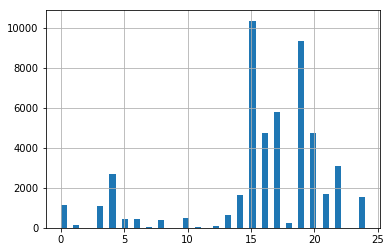

In [27]:
% matplotlib inline
pd.Series(agent_actions).hist(bins=50)

In [32]:
np.argmax(agent_q)

662

In [34]:
agent_q

(50859,)

In [38]:
np.argmax(phys_q)

5645